# Assignment

- You are given several data sets in text format.  For each of them:
  - Plot the data along with errorbars - explain how you obtain the size of the errorbars.
  - Propose a possible best curve fit for each of the data sets.  The exact nature of the function is not given, but some clues may be available.  
  - Perform a curve fitting using appropriate techniques for each of the data.  You need to explain whether you are choosing to use a linear or nonlinear curve fit, and why it is the right approach.  Comment on the accuracy of your approach and whether it gives a good result, or something better could have been done.
- For the straight line fit from the example above, compare the time taken, and accuracy of the fit, for `lstsq` *vs* `curve_fit`.  Comment on your observations.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

- Imported the required libraries using 'import' and 'from import' function. 

In [4]:
def stline(x, m, c):
    return m * x + c

- This function used to plot a straight line.
- Inputs are x (a point) , m (slope of the line) and c (intercept of the line)

In [5]:
def mean_square_error(y,yest):
    error=0
    for i in range(len(y)):
        error+=(y[i]-yest[i])**2
    return error

- This is ued to calculate the mean square error of two arrays yest and y where y is the output of a given data and yest is the estimated output which got from the function which I defined.

###### To get data from a dataset to the lists
- 'open' function is used to open the file.
- I am using a for loop to access every line of the file and each line has two coordinates x and y. 'split' function is used to access the two elements in two different variables X and Y. Each value of X and Y are appended to lists x and y.
- After I got everything into the lists, file is closed using close() function.

#### USING lstsq for dataset1

In [6]:
f=open("dataset1 - straight line.txt",'r')
y=[]
x=[]
for each in f :
    X,Y=map(float,each.split())
    y.append(Y)
    x.append(X)
f.close()
M = np.column_stack([x, np.ones(len(x))])
(m1, c1), _, _, _ = np.linalg.lstsq(M, y, rcond=None)
x=np.array(x)

In [7]:
print(f"The estimated equation is {m1} t + {c1}")

The estimated equation is 2.791124245414919 t + 3.8488001014307467


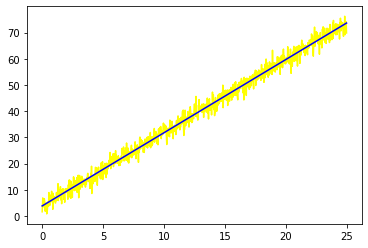

In [8]:
yest = stline(x, m1, c1) #estimated output with the values m1 and c1 which we got from the lstsq function.
plt.plot(x,y,color="yellow")
plt.plot(x,yest,color="blue")

###### Errorbar plot for dataset 1 using lstsq

<ErrorbarContainer object of 3 artists>

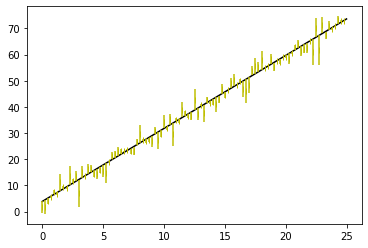

In [9]:
e=y-yest #list of errors at every point of the curve by subtracting original output and estimated output.
e=e.tolist()
plt.plot(x,yest,color="black")
plt.errorbar(x[::10], y[::10],yerr=e[::10],fmt="y|") #yerr=errorbar sizes in y-direction

#### USING curve_fit for dataset1

In [10]:
(m2,c2),_=curve_fit(stline,x,y) #slope and intercept
print(m2,c2)

2.7911242448201588 3.848800111263445


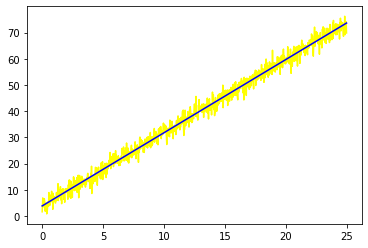

In [11]:
yest1=stline(x,m2,c2)
plt.plot(x,y,color="yellow")
plt.plot(x,yest1,color="blue")

###### Errorbar plot for dataset1 using curve_fit

<ErrorbarContainer object of 3 artists>

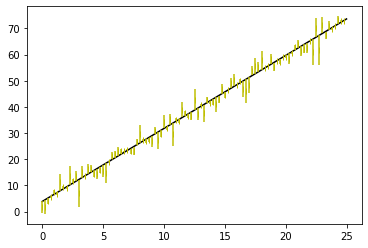

In [12]:
e1=y-yest1 #list of errors at every point of the curve by subtracting original output and estimated output.
e1=e1.tolist() #to avoid error in yerr parameter of errorbar
plt.plot(x,yest1,color="black")
plt.errorbar(x[::10], y[::10],yerr=e1[::10],fmt="y|") #yerr=errorbar sizes in y-direction

In [13]:
%timeit np.linalg.lstsq(M, y, rcond=None)

70.6 µs ± 1.24 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [14]:
%timeit curve_fit(stline,x,y)

246 µs ± 9.61 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


- curve_fit is taking more time compared to lstsq

In [15]:
#compare mean square errors of lstsq and curve_fit
#lstsq
error_lstsq=mean_square_error(y,yest)
error_curve_fit=mean_square_error(y,yest1)
print(error_lstsq)
print(error_curve_fit)

3983.4123805732766
3983.412380573275


- I calculated the mean square errors of the dataset1 using the mean_square_error function for both the estimated outputs of lstsq and curve_fit.
- From the values obtained, we can conclude that curve_fit has a little more accuracy than lstsq

###### USING curve_fit for dataset2

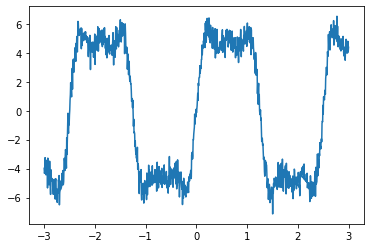

In [16]:
f2=open("dataset2-fourier.txt",'r')
y2=[]
x2=[]
for each in f2 :
    X,Y=map(float,each.split())
    y2.append(Y)
    x2.append(X)
f2.close()
plt.plot(x2,y2)
x2=np.array(x2)

- I used curve_fit instead of lstsq because it is a non linear plot.
- The above graph is similar to a square wave.
- square function defined below is to sum of harmonics of a square wave.

fundamental frequency =[0.99947664]


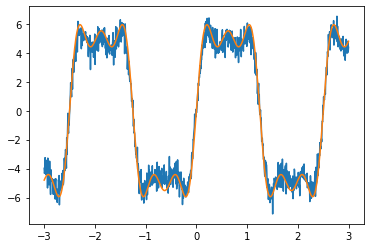

In [19]:
def square(t,p):
    s=0
    for i in range(3):
        s+=np.sin((p*np.pi*(2*i+1)*t)/1.25)/(2*i+1)
    return (20*s)/np.pi
(q1),_=curve_fit(square,x2,y2) #q1 is the fundamental frequency of the fourier series of the square wave.
y2est = square(x2, q1)
plt.plot(x2, y2, x2, y2est)
print("fundamental frequency ="+str(q1))

- Fourier series of a square wave of amplitude 1 is 4/pi(infinite sum(1/(2*i+1)sin(((2*i+1)*pi*p)/L)))
- where 
    1. L is the T-on time of a square wave
    2. i ranges from 1 to infinite for a perfect square wave.
    3. p is the fundamental frequency of the fourier frequency in hertz.        

- To get the graph for data set 2, I took L=1.25, I have used only 3 sine waves and to match the amplitude, I multiplied the fourier series with 5 

- No. of harmonics (sine waves) used is 3
- The amplitude of the every harmonic is 20/pi
- I got fundamental frequency from the curve_fit function which is equal to 0.999476638656579
- I feel this is a good fit for the given data

###### Error bar plot for dataset2

<ErrorbarContainer object of 3 artists>

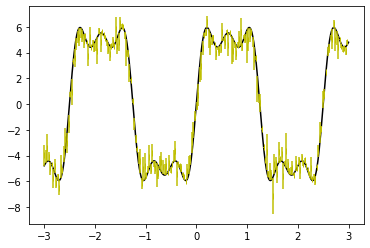

In [20]:
e2=y2-y2est #list of errors at every point of the curve by subtracting original output and estimated output. 
e2=e2.tolist() #to avoid error in yerr parameter of errorbar
plt.plot(x2,y2est,color="black")
plt.errorbar(x2[::5], y2[::5],yerr=e2[::5],fmt="y|") #yerr=errorbar sizes in y-direction

###### USING curve_fit for dataset3

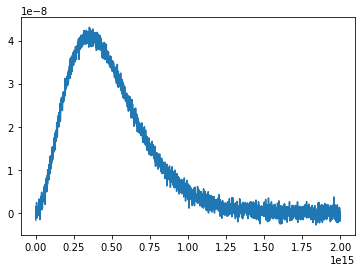

In [21]:
f3=open("dataset3-planck.txt",'r')
y3=[]
x3=[]
for each in f3 :
    X,Y=map(float,each.split())
    y3.append(Y)
    x3.append(X)
f3.close()
plt.plot(x3,y3)
x3=np.array(x3)
y3=np.array(y3)

- As it is a non linear curve, I used curve_fit instead of lstsq

In [22]:
def plancks(f,h,T): # equation corresponding to planck's law
    c=3*pow(10,8) #speed of light
    k=1.38*pow(10,-23) #boltzman constant
    pi=np.pi  #h is planck constant
    return (2*h*pow(f,3))/(pow(c,2)*(np.exp((h*f)/(k*T))-1))

- Dataset 3 corresponds to the plancks law of blackbody radiation.
- The formula to calculate the spectral radiation of a body for frequency f and absolute temperature T is (2*h*pow(f,3))/(pow(c,2)*(np.exp((h*f)/(k*T))-1)).

In [23]:
(h,T),_=curve_fit(plancks,x3,y3,p0=[1e-34,500])
print(h,T)

6.643229743116326e-34 6011.361511563131


- curve fit function is used to find the values of the parameters h, T.
- p0 attribute in the curve_fit function is used to make initial guess for the parameters (length N), where N is the number of parameters.
- I gave 1e-34 and 500 as initial guesses for h, T respectively.
- the temperature at which the observations were taken = 6011.361511563131K
- The estimated planck constant=6.643229743116326e-34

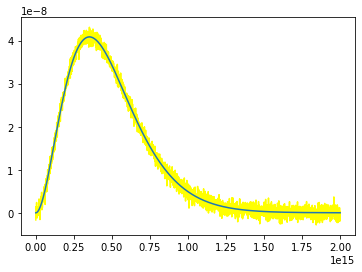

In [24]:
y3est=plancks(x3,h,T)
plt.plot(x3,y3,color="yellow")
plt.plot(x3,y3est,)

- I think this is good fit for dataset 3

###### Errorbar plot for dataset3

<ErrorbarContainer object of 3 artists>

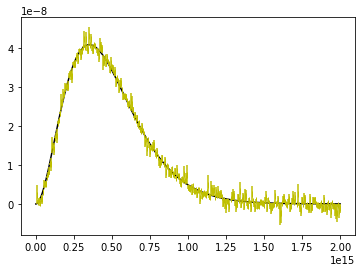

In [25]:
e3=y3-y3est #list of errors at every point of the curve by subtracting original output and estimated output.
plt.plot(x3,y3est,color="black")
plt.errorbar(x3[::10], y3[::10],yerr=e3[::10],fmt="y|") #yerr=errorbar sizes in y-direction

#### USING curve_fit for dataset4

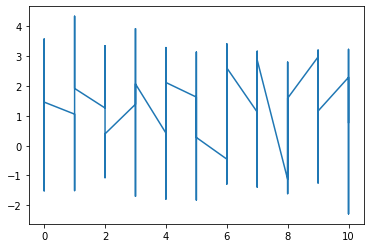

In [26]:
f4=open("dataset4-unknown.txt",'r')
y4=[]
x4=[]
for each in f4 :
    X,Y=map(float,each.split())
    y4.append(Y)
    x4.append(X)
f4.close()
plt.plot(x4,y4)
x4=np.array(x4)

- As the plot is not a straight line, I want to use curve_fit funtion.

In [27]:
def squares(t,p): #fourier series of square wave having L=1.25
    s=0
    for i in range(300):
        s+=np.sin((p*np.pi*(2*i+1)*t)/1.25)/(2*i+1)
    return (4*s)/np.pi

In [28]:
(freq),_=curve_fit(squares,x4,y4)
print("The fundamental frequency of the fourier series of the square wave is "+str(freq))

The fundamental frequency of the fourier series of the square wave is [1.00024644]


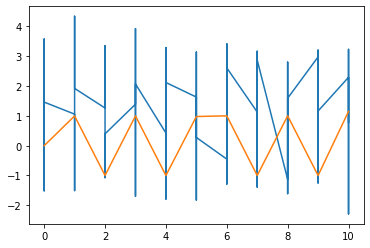

In [29]:
plt.plot(x4,y4)
y4est=squares(x4,freq)
plt.plot(x4,y4est)

- This is not a good fit for the given data, something better could have been done.

###### Errorbar plot for dataset 4 

<ErrorbarContainer object of 3 artists>

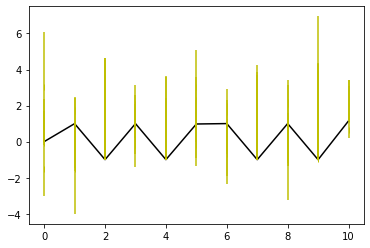

In [30]:
e4=y4-y4est #list of errors at every point of the curve by subtracting original output and estimated output.
plt.plot(x4,y4est,color="black")
plt.errorbar(x4[::10], y4[::10],yerr=e4[::10],fmt="y|") #yerr=errorbar sizes in y-direction


###### NOTE:
- First import the libraries which u require.
- Run the user defined function before you use it in some other cell.

- This is an .ipynb file, which we can run in Jupyter notebook or Jupyter lab.
- In Jupyter lab, we need to upload this document to the workspace and start editting and running.
- In jupyter notebook, which is a local host of our pc, we need to know where the file is located, opening this file is same as we do in file manager.
- To open in jupyter notebook, first we need to unzip the file i.e., extract all the files from it and open the ipynb file.